In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import defaultdict
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('numeric_outliers.csv')

In [3]:
# In ra các thuộc tính (columns) của DataFrame df
print(df.columns)

Index(['startYear', 'runtimeMinutes', 'totalImages', 'totalVideos',
       'criticReviewsTotal', 'canHaveEpisodes', 'isRatable', 'isAdult',
       'numRegions', 'userReviewsTotal', 'ratingCount', 'castNumber',
       'companiesNumber', 'averageRating', 'writerCredits', 'directorsCredits',
       'quotesTotal', 'ratewinningawards'],
      dtype='object')


In [7]:
raw_data = pd.read_csv('handlingallmissingvalues_df.csv')

In [8]:
import numpy as np
import pandas as pd

# Giả sử bạn có dữ liệu df_scale là DataFrame đã chuẩn hóa

# Phương pháp Freedman-Diaconis cho toàn bộ dữ liệu
def freedman_diaconis_all(data):
    # Tính IQR (Khoảng tứ phân vị) cho toàn bộ dữ liệu
    Q1 = np.percentile(data, 25, axis=0)  # Percentile cho toàn bộ cột
    Q3 = np.percentile(data, 75, axis=0)
    IQR = Q3 - Q1
    
    # Số lượng mẫu
    n = len(data)
    
    # Tính chiều rộng bin
    bin_width = 2 * np.median(IQR) * n ** (-1/3)  # Dùng IQR trung bình (median) cho tính toán
    
    # Tính số lượng bin cho toàn bộ dữ liệu
    bin_count = int(np.ceil((data.max().max() - data.min().min()) / bin_width))  # Tính phạm vi dữ liệu chung
    
    return bin_count

# Phương pháp Sturges cho toàn bộ dữ liệu
def sturges_all(data):
    # Số lượng mẫu
    n = len(data)
    
    # Tính số lượng bin theo công thức Sturges cho toàn bộ dữ liệu
    bin_count = int(np.ceil(np.log2(n) + 1))
    
    return bin_count

# Giả sử dữ liệu của bạn đã được chuẩn hóa trong df_scale
# Tính số lượng bins theo phương pháp Freedman-Diaconis cho toàn bộ dữ liệu
bins_fd_all = freedman_diaconis_all(df_scale)
print(f"Số lượng bins (Freedman-Diaconis) cho toàn bộ dữ liệu: {bins_fd_all}")

# Tính số lượng bins theo phương pháp Sturges cho toàn bộ dữ liệu
bins_sturges_all = sturges_all(df_scale)
print(f"Số lượng bins (Sturges) cho toàn bộ dữ liệu: {bins_sturges_all}")


Số lượng bins (Freedman-Diaconis) cho toàn bộ dữ liệu: 572718
Số lượng bins (Sturges) cho toàn bộ dữ liệu: 19


# HBOS

In [17]:
from pyod.models.hbos import HBOS

In [14]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

In [20]:
clf = HBOS(n_bins=19, contamination = 0.02)
clf.fit(df_scale)

HBOS(alpha=0.1, contamination=0.02, n_bins=19, tol=0.5)

In [21]:
outliers_hbos = clf.predict(df_scale)
np.unique(outliers_hbos, return_counts=True)

(array([0, 1]), array([146540,   2991], dtype=int64))

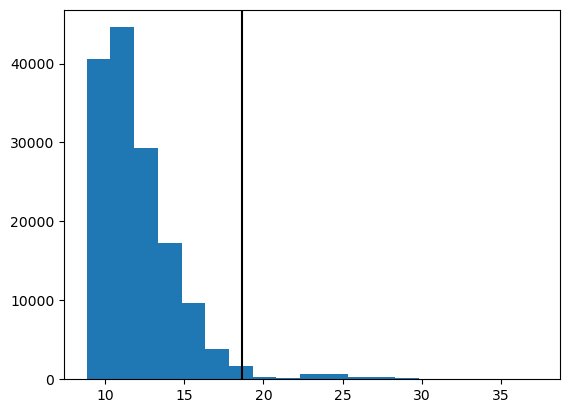

In [22]:
plt.hist(clf.decision_scores_, bins=19)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_hbos==1)]), c='k')
plt.show()

In [24]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,castNumber,companiesNumber,averageRating,writerCredits,directorsCredits,quotesTotal,ratewinningawards,is_outlier
0,1894,1.0,2,0,3,0,1,0,7,16,2092,1,3,5.7,0,1,0,0.0,False
1,1892,12.0,2,0,0,0,1,0,6,1,183,0,0,5.4,0,1,0,0.0,False
2,1894,1.0,1,0,0,0,1,0,5,0,195,0,1,5.0,0,1,0,0.0,False
3,1894,1.0,3,0,2,0,1,0,6,20,2238,1,6,5.4,0,1,0,1.0,True
4,1896,1.0,12,0,16,0,1,0,21,66,13115,6,5,7.4,0,2,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,11,0,2,7.0,1,1,0,0.0,False
149527,2019,14.0,4,1,1,0,1,0,1,0,15,6,3,6.4,1,1,0,0.0,False
149528,2019,30.0,2,3,0,0,1,0,0,0,12,1,0,5.6,0,0,0,0.0,False
149529,2011,10.0,1,0,0,0,1,0,0,0,10,7,0,7.1,3,1,0,0.0,False


In [26]:
df["Outlier HBOS"] = outliers_hbos
#df_outliers_hbos = df[df["Outlier HBOS"] == 1]
#outlier_indices_hbos = df_outliers_hbos.index
#raw_data_outliers = raw_data.loc[outlier_indices_hbos]

In [27]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,castNumber,companiesNumber,averageRating,writerCredits,directorsCredits,quotesTotal,ratewinningawards,is_outlier,Outlier HBOS
0,1894,1.0,2,0,3,0,1,0,7,16,2092,1,3,5.7,0,1,0,0.0,False,0
1,1892,12.0,2,0,0,0,1,0,6,1,183,0,0,5.4,0,1,0,0.0,False,0
2,1894,1.0,1,0,0,0,1,0,5,0,195,0,1,5.0,0,1,0,0.0,False,0
3,1894,1.0,3,0,2,0,1,0,6,20,2238,1,6,5.4,0,1,0,1.0,True,1
4,1896,1.0,12,0,16,0,1,0,21,66,13115,6,5,7.4,0,2,0,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,11,0,2,7.0,1,1,0,0.0,False,0
149527,2019,14.0,4,1,1,0,1,0,1,0,15,6,3,6.4,1,1,0,0.0,False,0
149528,2019,30.0,2,3,0,0,1,0,0,0,12,1,0,5.6,0,0,0,0.0,False,0
149529,2011,10.0,1,0,0,0,1,0,0,0,10,7,0,7.1,3,1,0,0.0,False,0


In [13]:
raw_data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 3 to 149510
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                2991 non-null   object 
 1   rating                       2991 non-null   object 
 2   startYear                    2991 non-null   int64  
 3   endYear                      2991 non-null   float64
 4   runtimeMinutes               2991 non-null   float64
 5   awardWins                    2991 non-null   int64  
 6   worstRating                  2991 non-null   int64  
 7   bestRating                   2991 non-null   int64  
 8   totalImages                  2991 non-null   int64  
 9   totalVideos                  2991 non-null   int64  
 10  totalCredits                 2991 non-null   int64  
 11  criticReviewsTotal           2991 non-null   int64  
 12  titleType                    2991 non-null   object 
 13  awardNominationsExclu

In [14]:
raw_data_outliers.to_csv('HBOS_outliers_2per.csv', index=False)

In [15]:
print(f"Tổng số dòng của dataset đã lọc: {raw_data_outliers.shape[0]}")

Tổng số dòng của dataset đã lọc: 2991


## PCA

In [4]:
HBOS_outliers = pd.read_csv('HBOS_outliers_2per.csv')

In [13]:
HBOS_outliers

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,worstRating,bestRating,totalImages,totalVideos,...,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
0,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1895.0,1.0,1,1,10,3,0,...,6,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",6,0,1,['silent'],0,['NA'],1.000000
1,The Great Train Robbery,"(7, 8]",1903,1904.0,11.0,1,1,10,21,0,...,11,7.3,"['\\N', 'JP', 'SE', 'DE', 'DK', 'NO', 'CO', 'F...",57,2,1,['silent'],0,['NA'],1.000000
2,The Exploits of Elaine,"(6, 7]",1914,1915.0,220.0,1,1,10,21,0,...,5,6.2,"['\\N', 'DK', 'SE', 'ES', 'RU', 'MX', 'JP', 'D...",5,4,4,['silent'],0,['NA'],1.000000
3,The Perils of Pauline,"(6, 7]",1914,1915.0,199.0,1,1,10,53,0,...,7,6.3,"['\\N', 'RU', 'CA', 'GB', 'JP', 'US', 'FR', 'B...",15,5,2,['silent'],0,['NA'],1.000000
4,"20,000 Leagues Under the Sea","(6, 7]",1916,1917.0,105.0,1,1,10,111,0,...,13,6.1,"['\\N', 'BR', 'RS', 'UY', 'SE', 'DK', 'HU', 'U...",44,2,1,['silent'],1,['NA'],1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,Nomadland,"(7, 8]",2020,2021.0,107.0,254,1,10,511,45,...,51,7.3,"['\\N', 'CL', 'CO', 'DE', 'DK', 'EC', 'EG', 'E...",430,2,1,"['dolby_digital', 'imax_6_track', 'dts', 'dolb...",30,['NA'],0.621027
2987,Selling Sunset,"(6, 7]",2019,2020.0,30.0,2,1,10,91,12,...,13,6.5,"['\\N', 'GB', 'ID', 'IN', 'IT', 'MX', 'NL', 'P...",19,0,0,['dolby_digital'],0,['NA'],0.133333
2988,Post Mortem,"(5, 6]",2020,2021.0,115.0,27,1,10,156,1,...,15,5.5,"['\\N', 'GB', 'HU', 'ID', 'IN', 'IT', 'NL', 'P...",200,3,1,['d_cinema_48khz 5.1'],0,['EU'],0.529412
2989,The Walking Dead: The Ones Who Live,"(7, 8]",2024,2024.0,60.0,0,1,10,326,15,...,7,7.9,"['\\N', 'GB', 'IN', 'IT', 'MX', 'US', 'EE', 'V...",30,0,0,['stereo'],0,['NA'],0.000000


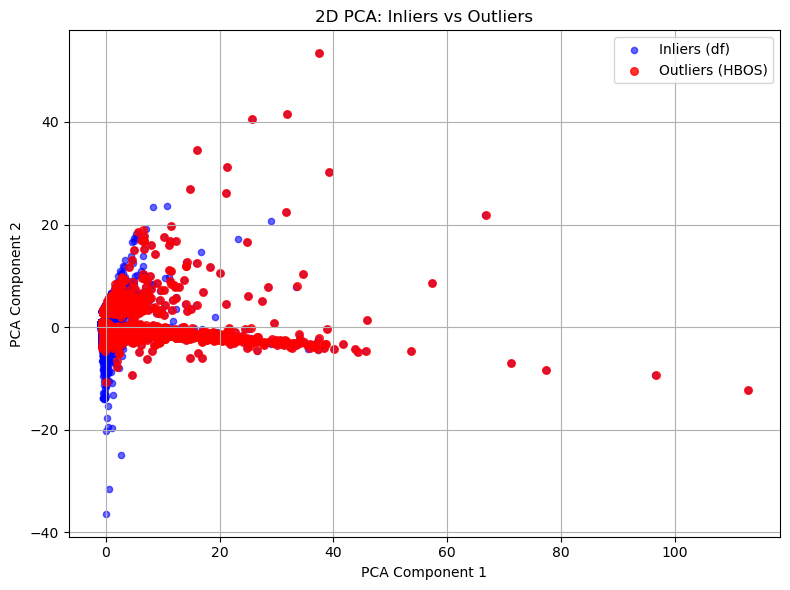

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Giả sử df và HBOS_outliers đã được load sẵn, ví dụ:
# df = pd.read_csv('dataset.csv')
# HBOS_outliers = pd.read_csv('hbos_outliers.csv')

# 1. Lọc các attribute cần dùng
attrs = [
    'startYear', 'runtimeMinutes', 'totalImages', 'totalVideos',
    'criticReviewsTotal', 'canHaveEpisodes', 'isRatable', 'isAdult',
    'numRegions', 'userReviewsTotal', 'ratingCount', 'castNumber',
    'companiesNumber', 'averageRating', 'writerCredits', 'directorsCredits',
    'quotesTotal', 'ratewinningawards'
]

X_df   = df[attrs].copy()
X_hbos = HBOS_outliers[attrs].copy()

# 2. Chuẩn hóa dữ liệu (vì PCA nhạy với scale)
scaler = StandardScaler()
X_all = pd.concat([X_df, X_hbos], axis=0)
X_all_scaled = scaler.fit_transform(X_all)

# 3. PCA 2 chiều
pca = PCA(n_components=2)
X_pca_all = pca.fit_transform(X_all_scaled)

# Tách lại cho từng tập
n_df   = len(X_df)
X_pca_df   = X_pca_all[:n_df]
X_pca_hbos = X_pca_all[n_df:]

# 4. Vẽ scatter
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_df[:, 0], X_pca_df[:, 1],
    c='blue', label='Inliers (df)', alpha=0.6, s=20, marker='o'
)
plt.scatter(
    X_pca_hbos[:, 0], X_pca_hbos[:, 1],
    c='red',  label='Outliers (HBOS)', alpha=0.8, s=30, marker='o'
)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA: Inliers vs Outliers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ISOLATION FOREST

In [28]:
from pyod.models.iforest import IsolationForest

In [29]:
clf = IsolationForest(contamination = 0.02)
clf.fit(df_scale)

IsolationForest(contamination=0.02)

In [30]:
outliersiso = clf.predict(df_scale)
np.unique(outliersiso, return_counts=True)

(array([-1,  1]), array([  2991, 146540], dtype=int64))

In [34]:
# 1. Dự đoán:  1 = inlier, -1 = outlier
y_pred = clf.predict(df_scale)

# 2. Chuyển về 0/1:  outlier -> 1, inlier -> 0
outliersiso = np.where(y_pred == -1, 1, 0)

# 3. Đếm số lượng
unique_vals, counts = np.unique(outliersiso, return_counts=True)
print(dict(zip(unique_vals, counts)))
# Kết quả sẽ cho dạng {0: số inliers, 1: số outliers}

{0: 146540, 1: 2991}


ValueError: zero-size array to reduction operation minimum which has no identity

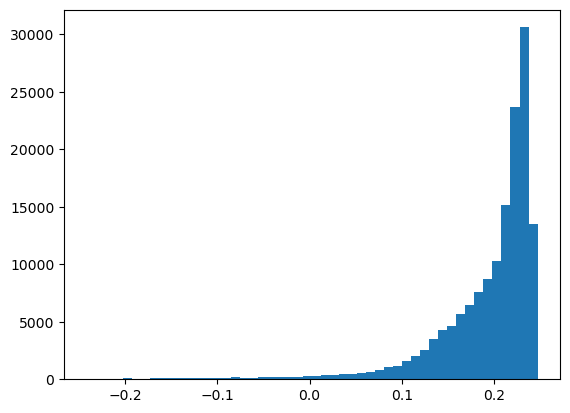

In [35]:
plt.hist(clf.decision_function(df_scale), bins=50)
plt.axvline(np.min(clf.decision_function(df_scale)[np.where(outliersiso==-1)]), c='k')
plt.show()

In [36]:
df["Outlier ISO"] = outliersiso
#df_outliers_iso = df[df["Outlier ISO"] == -1]
#outlier_indices_iso = df_outliers_iso.index
#raw_data_outliers_iso = raw_data.loc[outlier_indices_iso]

In [21]:
raw_data_outliers_iso.to_csv('ISO_outliers_2per.csv', index=False)

In [22]:
print(f"Tổng số dòng của dataset đã lọc: {raw_data_outliers_iso.shape[0]}")

Tổng số dòng của dataset đã lọc: 2991


In [37]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,...,castNumber,companiesNumber,averageRating,writerCredits,directorsCredits,quotesTotal,ratewinningawards,is_outlier,Outlier HBOS,Outlier ISO
0,1894,1.0,2,0,3,0,1,0,7,16,...,1,3,5.7,0,1,0,0.0,False,0,0
1,1892,12.0,2,0,0,0,1,0,6,1,...,0,0,5.4,0,1,0,0.0,False,0,0
2,1894,1.0,1,0,0,0,1,0,5,0,...,0,1,5.0,0,1,0,0.0,False,0,0
3,1894,1.0,3,0,2,0,1,0,6,20,...,1,6,5.4,0,1,0,1.0,True,1,1
4,1896,1.0,12,0,16,0,1,0,21,66,...,6,5,7.4,0,2,0,0.0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,...,0,2,7.0,1,1,0,0.0,False,0,0
149527,2019,14.0,4,1,1,0,1,0,1,0,...,6,3,6.4,1,1,0,0.0,False,0,0
149528,2019,30.0,2,3,0,0,1,0,0,0,...,1,0,5.6,0,0,0,0.0,False,0,0
149529,2011,10.0,1,0,0,0,1,0,0,0,...,7,0,7.1,3,1,0,0.0,False,0,0


## PCA 

In [11]:
LODA_outliers = pd.read_csv('LODA_outliers_2per.csv')

Outliers: 2085, Inliers: 147446


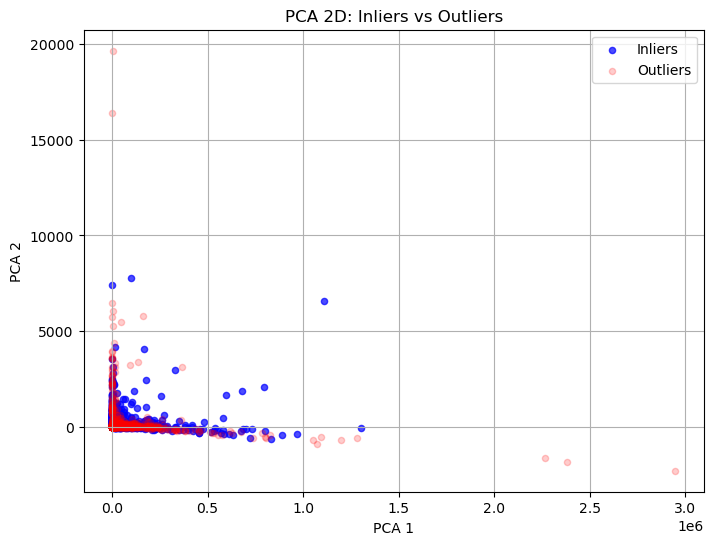

In [12]:
# 1. Lọc các điểm trùng nhau giữa HBOS_outliers và df theo các thuộc tính cho trước
attrs = [
    'startYear', 'runtimeMinutes', 'totalImages', 'totalVideos',
    'criticReviewsTotal', 'canHaveEpisodes', 'isRatable', 'isAdult',
    'numRegions', 'userReviewsTotal', 'ratingCount', 'castNumber',
    'companiesNumber', 'averageRating', 'writerCredits', 'directorsCredits',
    'quotesTotal', 'ratewinningawards'
]

# Đánh dấu từng hàng của df xem có nằm trong HBOS_outliers không
# tạo cột is_outlier ban đầu False
df['is_outlier'] = False

# Chuyển cả hai DataFrame về chỉ chứa attrs để so sánh
hb = LODA_outliers[attrs].drop_duplicates()
# Dùng merge với indicator để đánh dấu
merged = df.merge(hb.assign(__hb__=1), on=attrs, how='left')
df['is_outlier'] = merged['__hb__'].fillna(0).astype(bool)

# 2. Bây giờ df['is_outlier'] == True chính là các outlier
# In ra số outlier và inlier
print(f"Outliers: {df['is_outlier'].sum()}, Inliers: {len(df)-df['is_outlier'].sum()}")

# 3. PCA 2 chiều và vẽ
X = df[attrs].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
# scatter inliers
mask_in = ~df['is_outlier']
plt.scatter(
    X_pca[mask_in, 0], X_pca[mask_in, 1],
    c='blue', label='Inliers', alpha=0.7, s=20, marker='o'
)

# scatter outliers (hình tròn màu đỏ)
mask_out = df['is_outlier']
plt.scatter(
    X_pca[mask_out, 0], X_pca[mask_out, 1],
    c='red', label='Outliers', alpha=0.2, s=20, marker='o'
)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2D: Inliers vs Outliers')
plt.legend()
plt.grid(True)
plt.show()

# LODA

In [38]:
from pyod.models.loda import LODA

In [39]:
clf = LODA(contamination=0.02, n_bins=19, n_random_cuts=200)
clf.fit(df_scale)

LODA(contamination=0.02, n_bins=19, n_random_cuts=200)

In [40]:
outliers = clf.predict(df_scale)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([146540,   2991], dtype=int64))

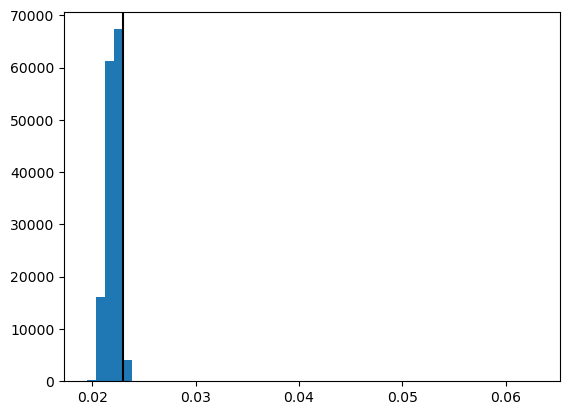

In [41]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [42]:
df["Outlier LODA"] = outliers
#df_outliers_loda = df[df["Outlier LODA"] == 1]
#outlier_indices_loda = df_outliers_loda.index
#raw_data_outliers_loda = raw_data.loc[outlier_indices_loda]

In [28]:
print(f"Tổng số dòng của dataset đã lọc: {raw_data_outliers_loda.shape[0]}")

Tổng số dòng của dataset đã lọc: 2991


In [29]:
raw_data_outliers_loda.to_csv('LODA_outliers_2per.csv', index=False)

In [43]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,...,companiesNumber,averageRating,writerCredits,directorsCredits,quotesTotal,ratewinningawards,is_outlier,Outlier HBOS,Outlier ISO,Outlier LODA
0,1894,1.0,2,0,3,0,1,0,7,16,...,3,5.7,0,1,0,0.0,False,0,0,1
1,1892,12.0,2,0,0,0,1,0,6,1,...,0,5.4,0,1,0,0.0,False,0,0,0
2,1894,1.0,1,0,0,0,1,0,5,0,...,1,5.0,0,1,0,0.0,False,0,0,0
3,1894,1.0,3,0,2,0,1,0,6,20,...,6,5.4,0,1,0,1.0,True,1,1,0
4,1896,1.0,12,0,16,0,1,0,21,66,...,5,7.4,0,2,0,0.0,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,...,2,7.0,1,1,0,0.0,False,0,0,0
149527,2019,14.0,4,1,1,0,1,0,1,0,...,3,6.4,1,1,0,0.0,False,0,0,0
149528,2019,30.0,2,3,0,0,1,0,0,0,...,0,5.6,0,0,0,0.0,False,0,0,0
149529,2011,10.0,1,0,0,0,1,0,0,0,...,0,7.1,3,1,0,0.0,False,0,0,0


# LOF

In [44]:
from pyod.models.lof import LOF

In [45]:
clf = LOF(contamination=0.02)
clf.fit(df_scale)

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
  

LOF(algorithm='auto', contamination=0.02, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [46]:
outlierslof = clf.predict(df_scale)
np.unique(outlierslof, return_counts=True)

(array([0, 1]), array([147003,   2528], dtype=int64))

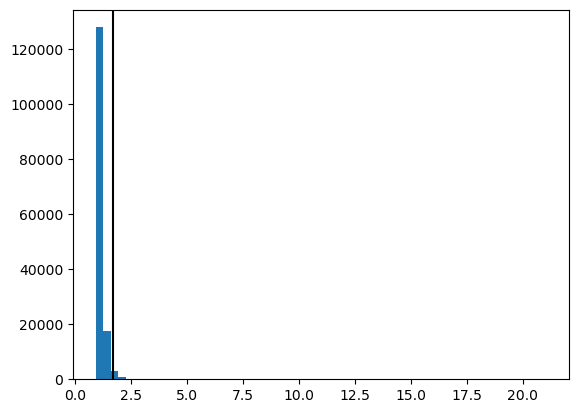

In [47]:
plt.hist(clf.decision_scores_, bins=60)
plt.axvline(np.min(clf.decision_scores_[np.where(outlierslof==1)]), c='k')
plt.show()

In [48]:
df["Outlier LOF"] = outlierslof
#df_outliers_lof = df[df["Outlier LOF"] == 1]
#outlier_indices = df_outliers_lof.index
#raw_data_outliers_lof = raw_data.loc[outlier_indices]

In [35]:
print(f"Tổng số dòng của dataset đã lọc: {raw_data_outliers_lof.shape[0]}")

Tổng số dòng của dataset đã lọc: 2512


In [36]:
raw_data_outliers_lof.to_csv('LOF_outliers_2per.csv', index=False)

In [49]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,...,averageRating,writerCredits,directorsCredits,quotesTotal,ratewinningawards,is_outlier,Outlier HBOS,Outlier ISO,Outlier LODA,Outlier LOF
0,1894,1.0,2,0,3,0,1,0,7,16,...,5.7,0,1,0,0.0,False,0,0,1,0
1,1892,12.0,2,0,0,0,1,0,6,1,...,5.4,0,1,0,0.0,False,0,0,0,0
2,1894,1.0,1,0,0,0,1,0,5,0,...,5.0,0,1,0,0.0,False,0,0,0,0
3,1894,1.0,3,0,2,0,1,0,6,20,...,5.4,0,1,0,1.0,True,1,1,0,1
4,1896,1.0,12,0,16,0,1,0,21,66,...,7.4,0,2,0,0.0,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,...,7.0,1,1,0,0.0,False,0,0,0,0
149527,2019,14.0,4,1,1,0,1,0,1,0,...,6.4,1,1,0,0.0,False,0,0,0,0
149528,2019,30.0,2,3,0,0,1,0,0,0,...,5.6,0,0,0,0.0,False,0,0,0,1
149529,2011,10.0,1,0,0,0,1,0,0,0,...,7.1,3,1,0,0.0,False,0,0,0,0


# CBLOF

In [50]:
from pyod.models.cblof import CBLOF

In [51]:
clf = CBLOF(contamination=0.02, n_clusters=3)
clf.fit(df_scale)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.02, n_clusters=3, n_jobs=None, random_state=None,
   use_weights=False)

In [52]:
outliers = clf.predict(df_scale)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([146540,   2991], dtype=int64))

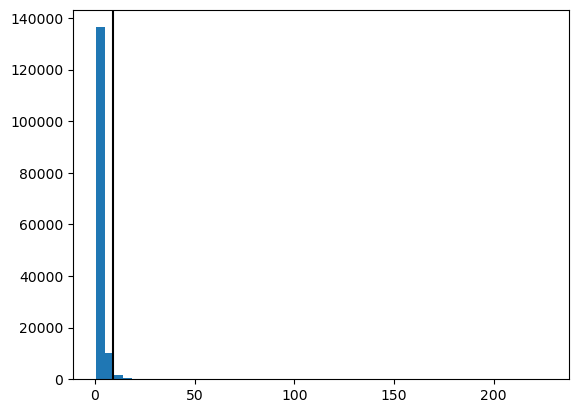

In [53]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [54]:
df["Outlier CBLOF"] = outliers
#df_outliers_cblof = df[df["Outlier CBLOF"] == 1]
#outlier_indices = df_outliers_cblof.index
#raw_data_outliers_cblof = raw_data.loc[outlier_indices]

In [42]:
print(f"Tổng số dòng của dataset đã lọc: {raw_data_outliers_cblof.shape[0]}")

Tổng số dòng của dataset đã lọc: 2991


In [43]:
raw_data_outliers_cblof.to_csv('CBLOF_outliers_2per.csv', index=False)

In [55]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,...,writerCredits,directorsCredits,quotesTotal,ratewinningawards,is_outlier,Outlier HBOS,Outlier ISO,Outlier LODA,Outlier LOF,Outlier CBLOF
0,1894,1.0,2,0,3,0,1,0,7,16,...,0,1,0,0.0,False,0,0,1,0,0
1,1892,12.0,2,0,0,0,1,0,6,1,...,0,1,0,0.0,False,0,0,0,0,0
2,1894,1.0,1,0,0,0,1,0,5,0,...,0,1,0,0.0,False,0,0,0,0,0
3,1894,1.0,3,0,2,0,1,0,6,20,...,0,1,0,1.0,True,1,1,0,1,1
4,1896,1.0,12,0,16,0,1,0,21,66,...,0,2,0,0.0,False,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,...,1,1,0,0.0,False,0,0,0,0,0
149527,2019,14.0,4,1,1,0,1,0,1,0,...,1,1,0,0.0,False,0,0,0,0,0
149528,2019,30.0,2,3,0,0,1,0,0,0,...,0,0,0,0.0,False,0,0,0,1,0
149529,2011,10.0,1,0,0,0,1,0,0,0,...,3,1,0,0.0,False,0,0,0,0,0


## ABOD

In [56]:
from pyod.models.abod import ABOD

In [57]:
clf = ABOD(n_neighbors=20, contamination=0.02)
clf.fit(df_scale)

ABOD(contamination=0.02, method='fast', n_neighbors=20)

In [58]:
outliers = clf.predict(df_scale)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([146572,   2959], dtype=int64))

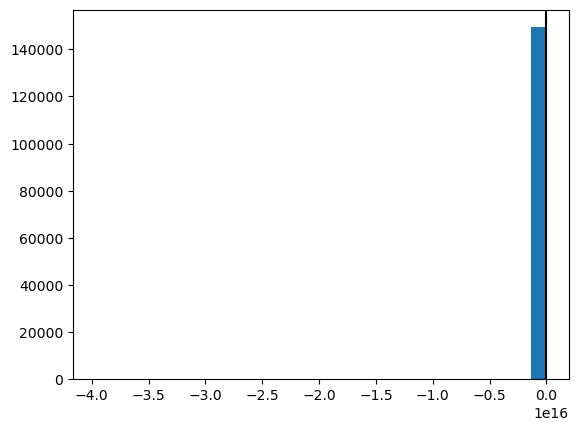

In [59]:
plt.hist(clf.decision_scores_, bins=30)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [60]:
df["Outlier ABOD"] = outliers
#df_outliers_abod = df[df["Outlier ABOD"] == 1]
#outlier_indices = df_outliers_abod.index
#raw_data_outliers_abod = raw_data.loc[outlier_indices]

In [49]:
print(f"Tổng số dòng của dataset đã lọc: {raw_data_outliers_abod.shape[0]}")

Tổng số dòng của dataset đã lọc: 2952


In [50]:
raw_data_outliers_abod.to_csv('abod_outliers_2per.csv', index=False)

In [63]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,...,directorsCredits,quotesTotal,ratewinningawards,is_outlier,Outlier HBOS,Outlier ISO,Outlier LODA,Outlier LOF,Outlier CBLOF,Outlier ABOD
0,1894,1.0,2,0,3,0,1,0,7,16,...,1,0,0.0,False,0,0,1,0,0,0
1,1892,12.0,2,0,0,0,1,0,6,1,...,1,0,0.0,False,0,0,0,0,0,0
2,1894,1.0,1,0,0,0,1,0,5,0,...,1,0,0.0,False,0,0,0,0,0,0
3,1894,1.0,3,0,2,0,1,0,6,20,...,1,0,1.0,True,1,1,0,1,1,1
4,1896,1.0,12,0,16,0,1,0,21,66,...,2,0,0.0,False,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,...,1,0,0.0,False,0,0,0,0,0,0
149527,2019,14.0,4,1,1,0,1,0,1,0,...,1,0,0.0,False,0,0,0,0,0,0
149528,2019,30.0,2,3,0,0,1,0,0,0,...,0,0,0.0,False,0,0,0,1,0,0
149529,2011,10.0,1,0,0,0,1,0,0,0,...,1,0,0.0,False,0,0,0,0,0,0


In [66]:
df = df.drop('is_outlier', axis = 1)

In [67]:
df

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,...,writerCredits,directorsCredits,quotesTotal,ratewinningawards,Outlier HBOS,Outlier ISO,Outlier LODA,Outlier LOF,Outlier CBLOF,Outlier ABOD
0,1894,1.0,2,0,3,0,1,0,7,16,...,0,1,0,0.0,0,0,1,0,0,0
1,1892,12.0,2,0,0,0,1,0,6,1,...,0,1,0,0.0,0,0,0,0,0,0
2,1894,1.0,1,0,0,0,1,0,5,0,...,0,1,0,0.0,0,0,0,0,0,0
3,1894,1.0,3,0,2,0,1,0,6,20,...,0,1,0,1.0,1,1,0,1,1,1
4,1896,1.0,12,0,16,0,1,0,21,66,...,0,2,0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96.0,0,0,0,0,1,0,1,0,...,1,1,0,0.0,0,0,0,0,0,0
149527,2019,14.0,4,1,1,0,1,0,1,0,...,1,1,0,0.0,0,0,0,0,0,0
149528,2019,30.0,2,3,0,0,1,0,0,0,...,0,0,0,0.0,0,0,0,1,0,0
149529,2011,10.0,1,0,0,0,1,0,0,0,...,3,1,0,0.0,0,0,0,0,0,0


In [68]:
print(df.columns)

Index(['startYear', 'runtimeMinutes', 'totalImages', 'totalVideos',
       'criticReviewsTotal', 'canHaveEpisodes', 'isRatable', 'isAdult',
       'numRegions', 'userReviewsTotal', 'ratingCount', 'castNumber',
       'companiesNumber', 'averageRating', 'writerCredits', 'directorsCredits',
       'quotesTotal', 'ratewinningawards', 'Outlier HBOS', 'Outlier ISO',
       'Outlier LODA', 'Outlier LOF', 'Outlier CBLOF', 'Outlier ABOD'],
      dtype='object')


# PCA

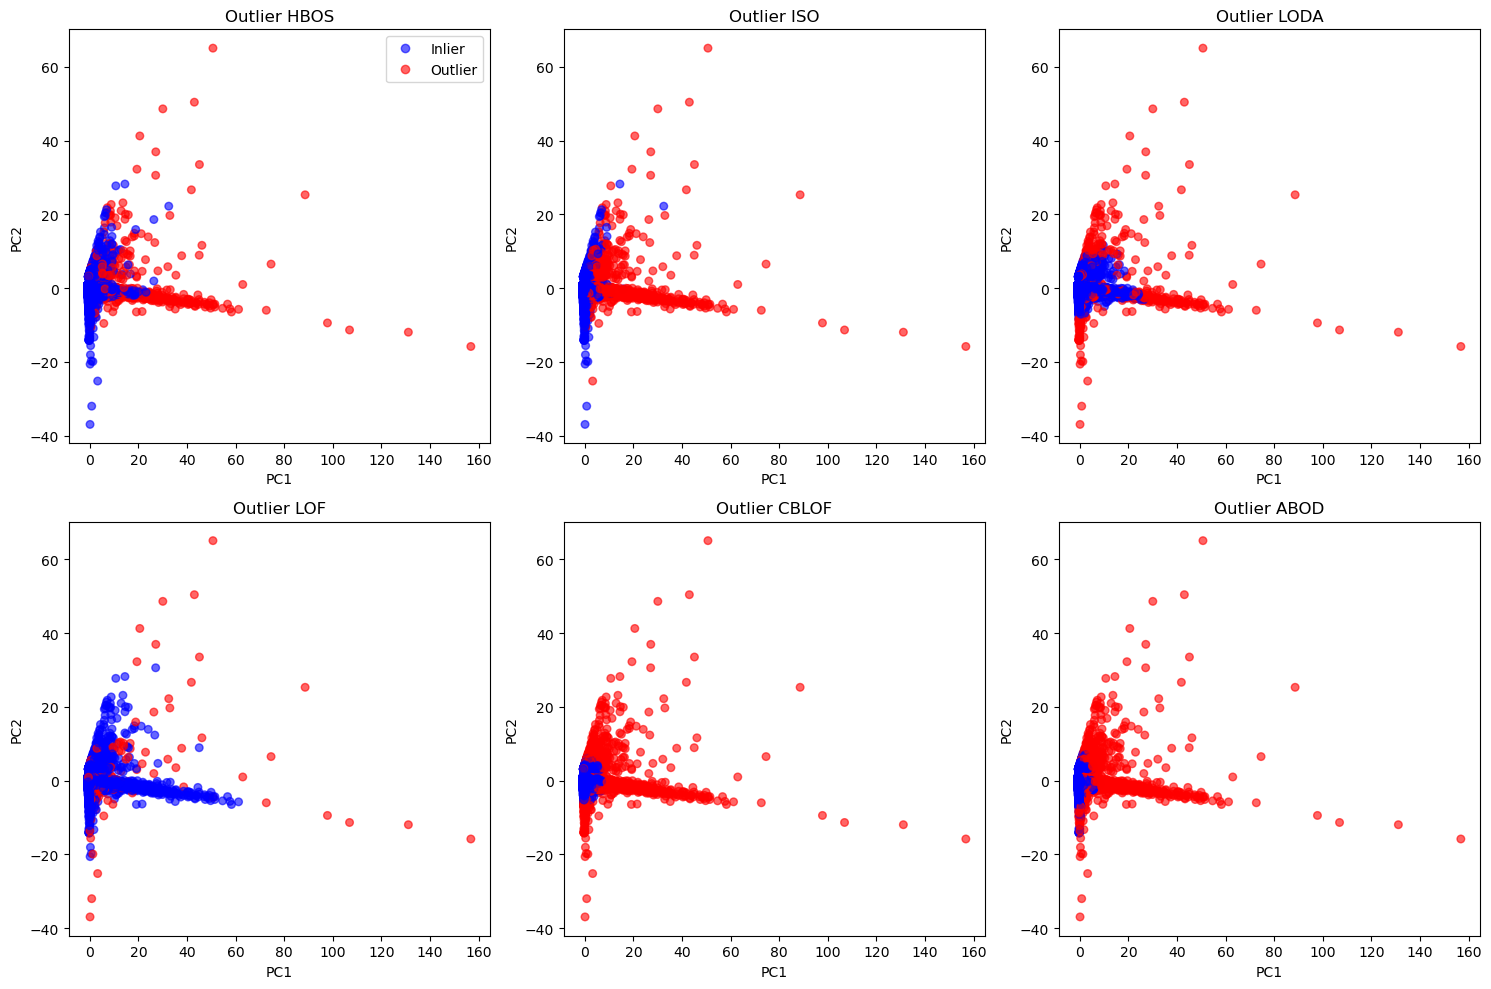

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Giả sử df đã được load sẵn và có 24 cột, trong đó 6 cột đánh dấu outlier:
outlier_cols = [
    'Outlier HBOS', 'Outlier ISO', 'Outlier LODA',
    'Outlier LOF', 'Outlier CBLOF', 'Outlier ABOD'
]

# 18 thuộc tính dùng cho PCA
pca_attrs = [
    'startYear', 'runtimeMinutes', 'totalImages', 'totalVideos',
    'criticReviewsTotal', 'canHaveEpisodes', 'isRatable', 'isAdult',
    'numRegions', 'userReviewsTotal', 'ratingCount', 'castNumber',
    'companiesNumber', 'averageRating', 'writerCredits', 'directorsCredits',
    'quotesTotal', 'ratewinningawards'
]

# 1. Chuẩn bị ma trận X và scale
X = df[pca_attrs].values
X_scaled = StandardScaler().fit_transform(X)

# 2. Tính PCA xuống 2 thành phần
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Tạo subplots 2 hàng × 3 cột
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for ax, out_col in zip(axes, outlier_cols):
    # màu dựa trên inlier(0)/outlier(1)
    colors = df[out_col]  # 0 hoặc 1

    sc = ax.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=colors,
        cmap='bwr',            # blue-white-red, 0→blue, 1→red
        alpha=0.6, s=30,       # độ mờ và kích thước
        marker='o'
    )
    ax.set_title(out_col)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    # chỉ show legend lần đầu
    if out_col == outlier_cols[0]:
        handles, labels = sc.legend_elements()
        ax.legend(handles, ['Inlier', 'Outlier'], loc='best')

plt.tight_layout()
plt.show()


## Final ouliers

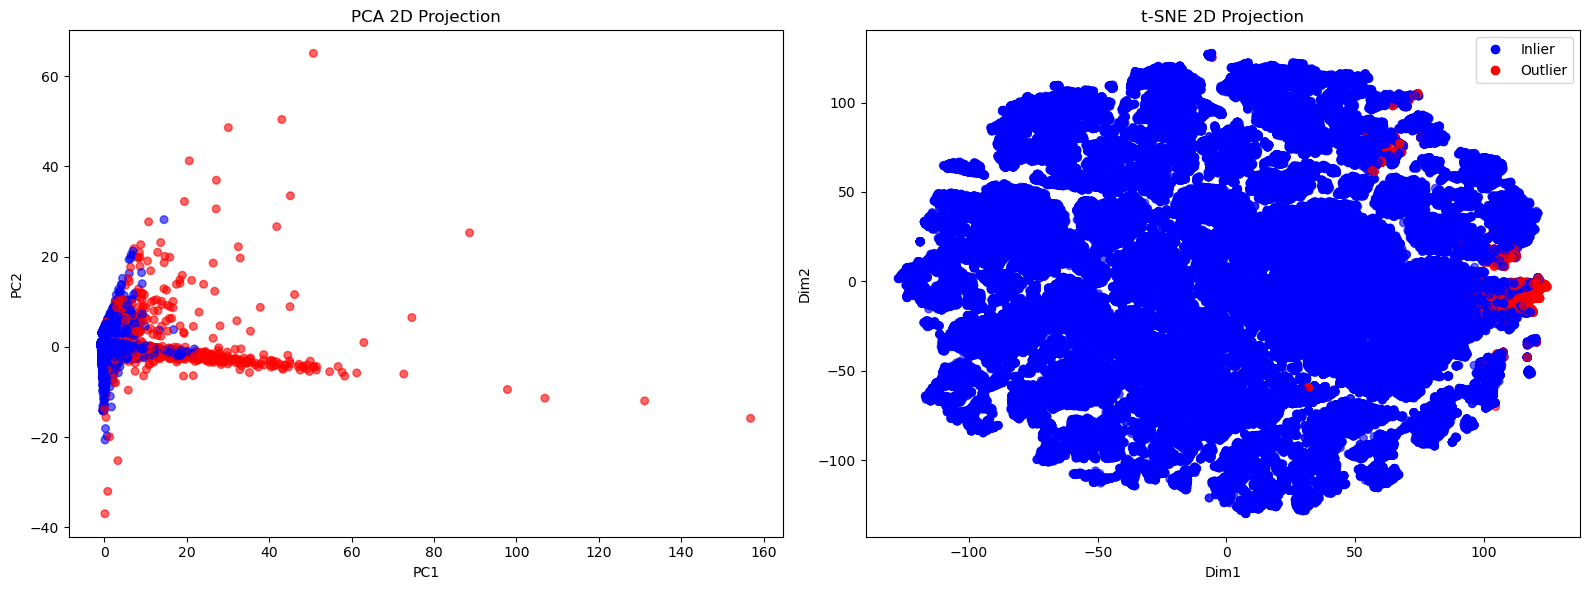

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Định nghĩa các cột outlier và tính cột chung
outlier_cols = [
    'Outlier HBOS', 'Outlier ISO', 'Outlier LODA',
    'Outlier LOF', 'Outlier CBLOF', 'Outlier ABOD'
]
# tạo cột mới: 1 nếu có >=4 phương pháp đánh giá là outlier
df['Outlier_Common'] = (df[outlier_cols].sum(axis=1) >= 4).astype(int)

# 2. Chọn 18 thuộc tính làm features cho PCA / t-SNE
pca_attrs = [
    'startYear', 'runtimeMinutes', 'totalImages', 'totalVideos',
    'criticReviewsTotal', 'canHaveEpisodes', 'isRatable', 'isAdult',
    'numRegions', 'userReviewsTotal', 'ratingCount', 'castNumber',
    'companiesNumber', 'averageRating', 'writerCredits', 'directorsCredits',
    'quotesTotal', 'ratewinningawards'
]

# 3. Lấy ma trận X và scale
#X = df[pca_attrs].values
#X_scaled = StandardScaler().fit_transform(X)

# 4. PCA xuống 2 chiều
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 5. t-SNE xuống 2 chiều
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 6. Vẽ hai biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# chuẩn bị color array: 0=inlier (xanh), 1=outlier (đỏ)
colors = df['Outlier_Common']

# --- PCA plot ---
axes[0].scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=colors, cmap='bwr',
    alpha=0.6, s=30, marker='o'
)
axes[0].set_title('PCA 2D Projection')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# --- t-SNE plot ---
axes[1].scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=colors, cmap='bwr',
    alpha=0.6, s=30, marker='o'
)
axes[1].set_title('t-SNE 2D Projection')
axes[1].set_xlabel('Dim1')
axes[1].set_ylabel('Dim2')

# 7. Tạo legend chung
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Inlier',
           markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Outlier',
           markerfacecolor='red',  markersize=8)
]
axes[1].legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()


In [75]:
df.to_csv('final_outliers_2per_2_5_2025.csv', index=False)

In [3]:
outliers = pd.read_csv('final_outliers_2per_2_5_2025.csv')

In [5]:
count = outliers[outliers['Outlier_Common'] == 1].shape[0]
print("Số lượng record có Outlier_Common = 1:", count)

Số lượng record có Outlier_Common = 1: 1533


In [9]:
## Lọc vào dataset riêng
df2 = outliers[outliers['Outlier_Common'] == 1].copy()


In [10]:
df2

,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,...,directorsCredits,quotesTotal,ratewinningawards,Outlier HBOS,Outlier ISO,Outlier LODA,Outlier LOF,Outlier CBLOF,Outlier ABOD,Outlier_Common
3,1894,1.0,3,0,2,0,1,0,6,20,...,1,0,1.000000,1,1,0,1,1,1,1
66,1903,11.0,21,0,48,0,1,0,23,119,...,1,0,1.000000,1,1,0,0,1,1,1
269,1914,220.0,21,0,3,0,1,0,12,1,...,4,0,1.000000,1,1,0,1,1,1,1
290,1914,199.0,53,0,9,0,1,0,9,7,...,2,0,1.000000,1,1,0,1,1,1,1
369,1916,105.0,111,0,31,0,1,0,16,33,...,1,1,1.000000,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148760,2021,144.0,254,21,279,0,1,0,56,612,...,1,24,0.000000,0,1,1,0,1,1,1
148974,2021,50.0,54,6,44,1,1,0,38,1152,...,0,0,0.000000,1,1,0,0,1,1,1
148975,2019,30.0,50,88,2,1,1,0,19,72,...,0,0,0.333333,1,1,0,0,1,1,1
149059,2021,150.0,164,22,47,1,1,0,30,338,...,0,0,0.000000,1,1,0,0,1,1,1


# Deviation based Approaches

In [72]:
from pyod.models.lmdd import LMDD

In [ ]:
clf = LMDD(contamination=0.02)
clf.fit(df_scale)

## kNN

In [1]:
from pyod.models.knn import KNN

In [7]:
clf = KNN(n_neighbors=15, contamination=0.02)
clf.fit(df_scale)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=15, p=2,
  radius=1.0)

In [ ]:
outliers = clf.predict(df_scale)
np.unique(outliers, return_counts=True)

# So sanhs cacs outliers

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
abod_outliers = pd.read_csv('abod_outliers_2per.csv')
CBLOF_outliers = pd.read_csv('CBLOF_outliers_2per.csv')
HBOS_outliers = pd.read_csv('HBOS_outliers_2per.csv')
ISO_outliers = pd.read_csv('ISO_outliers_2per.csv')
loda_outliers = pd.read_csv('LODA_outliers_2per.csv')
lof_Outliers = pd.read_csv('LOF_outliers_2per.csv')

Số record trùng nhau giữa các dataset: 58


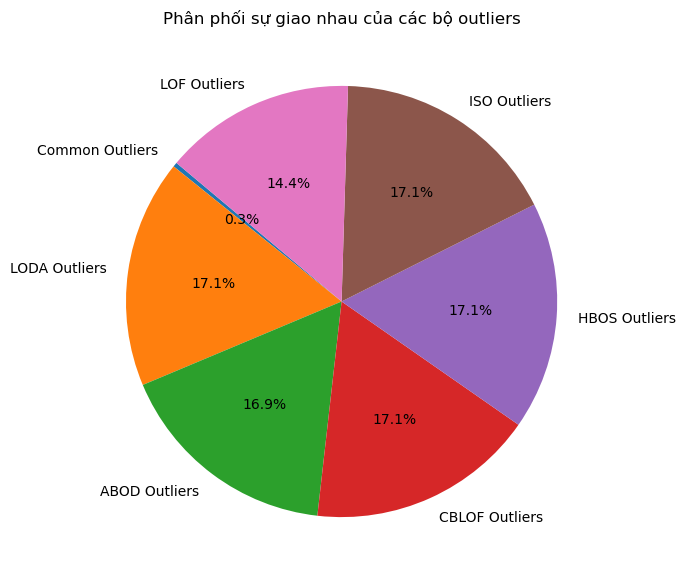

In [3]:
# Merge các dataset với nhau để tìm các records trùng nhau
common_data = loda_outliers  # Giả sử LODA_outliers là dataset chính
datasets = [abod_outliers, CBLOF_outliers, HBOS_outliers, ISO_outliers, lof_Outliers]

# Dùng merge để tìm các record trùng nhau giữa tất cả các dataset
for dataset in datasets:
    common_data = pd.merge(common_data, dataset, how='inner')

# In số lượng record trùng nhau
print(f"Số record trùng nhau giữa các dataset: {len(common_data)}")

# Tính số lượng record trong mỗi dataset
dataset_sizes = [len(loda_outliers), len(abod_outliers), len(CBLOF_outliers), 
                 len(HBOS_outliers), len(ISO_outliers), len(lof_Outliers)]

# Tạo danh sách chứa số lượng record trùng nhau và số record trong mỗi bộ outliers
overlap_counts = [len(common_data)] + dataset_sizes

# Labels cho biểu đồ tròn
labels = ['Common Outliers'] + [
    f'LODA Outliers', 
    f'ABOD Outliers', 
    f'CBLOF Outliers', 
    f'HBOS Outliers', 
    f'ISO Outliers', 
    f'LOF Outliers'
]

# Vẽ biểu đồ tròn để thể hiện sự giao nhau
plt.figure(figsize=(7, 7))
plt.pie(overlap_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Phân phối sự giao nhau của các bộ outliers")
plt.show()

In [5]:
# Tạo một dictionary để lưu thông tin về số lần mỗi record xuất hiện
record_counts = {}

# Danh sách các dataset
datasets = [abod_outliers, CBLOF_outliers, HBOS_outliers, ISO_outliers, loda_outliers, lof_Outliers]
dataset_names = ['ABOD', 'CBLOF', 'HBOS', 'ISO', 'LODA', 'LOF']

# Lặp qua mỗi dataset và cập nhật số lần mỗi record xuất hiện
for dataset, name in zip(datasets, dataset_names):
    for index, row in dataset.iterrows():
        record = tuple(row)  # Biến mỗi record thành tuple (có thể so sánh)
        if record not in record_counts:
            record_counts[record] = 0
        record_counts[record] += 1

# Lọc các records có ít nhất 3 lần xuất hiện
filtered_records = [record for record, count in record_counts.items() if count >= 4]

# Chuyển các records đã lọc thành DataFrame
columns = abod_outliers.columns  # Giả sử tất cả dataset đều có chung các cột
filtered_df = pd.DataFrame(filtered_records, columns=columns)

# Lưu kết quả vào file CSV mới
filtered_df.to_csv('outlier_dataset.csv', index=False)

# In ra số lượng records đã lọc được
print(f"Số lượng record thỏa mãn điều kiện: {len(filtered_df)}")

Số lượng record thỏa mãn điều kiện: 1541


In [55]:
print(filtered_df)

                                       originalTitle  rating  startYear  \
0                            The Great Train Robbery  (7, 8]       1903   
1                             The Exploits of Elaine  (6, 7]       1914   
2                              The Perils of Pauline  (6, 7]       1914   
3                                       Civilization  (5, 6]       1915   
4     Broken Blossoms or The Yellow Man and the Girl  (7, 8]       1919   
...                                              ...     ...        ...   
1536                                        The Muse  (5, 6]       1999   
1537                                    Tokyo Sonata  (7, 8]       2008   
1538                 Universal Soldier: Regeneration  (5, 6]       2009   
1539                                 Das erste Opfer  (6, 7]       2011   
1540                                     Gravitation  (7, 8]       1999   

      endYear  runtimeMinutes  awardWins  worstRating  bestRating  \
0      1904.0            11.0 

In [56]:
filtered_df.titleType.value_counts()

titleType
movie           1146
tvSeries         306
tvMiniSeries      30
tvEpisode         20
video             17
videoGame          8
tvMovie            6
short              4
tvSpecial          4
Name: count, dtype: int64

In [57]:
filtered_df.quotesTotal.value_counts()

quotesTotal
0      295
1       52
7       44
3       37
2       36
      ... 
107      1
138      1
162      1
664      1
203      1
Name: count, Length: 137, dtype: int64

In [58]:
filtered_df.userReviewsTotal.value_counts()

userReviewsTotal
0       39
1       18
4       11
40      10
67      10
        ..
408      1
797      1
295      1
191      1
1167     1
Name: count, Length: 620, dtype: int64

In [59]:
filtered_df.directorsCredits.value_counts()

directorsCredits
1     1063
0      339
2       79
3       15
4       10
8        7
7        6
9        4
5        4
6        4
10       2
14       2
36       1
16       1
58       1
13       1
50       1
31       1
Name: count, dtype: int64

In [60]:
filtered_df.continent.value_counts()

continent
['NA']                      846
['EU']                      246
['EU', 'NA']                192
['AS']                       88
['AS', 'NA']                 32
['EU', 'AS', 'NA']           24
['OC']                       18
['OC', 'NA']                 17
['NA', 'AS']                 15
['EU', 'OC', 'NA']           12
['EU', 'NA', 'AS']            7
['EU', 'OC']                  6
['EU', 'AS']                  6
['EU', 'OC', 'AS', 'NA']      5
['EU', 'AF', 'NA']            4
['SA']                        3
['OC', 'AS', 'NA']            3
['AF', 'NA']                  2
['AF']                        2
['EU', 'AF', 'AS', 'NA']      2
['SA', 'NA']                  2
['AF', 'OC', 'NA']            2
['SA', 'OC']                  2
['EU', 'SA']                  2
['OC', 'NA', 'AS']            1
['OC', 'AS']                  1
['AF', 'NA', 'AS']            1
Name: count, dtype: int64

In [61]:
filtered_df.rating.value_counts()

rating
(7, 8]     555
(6, 7]     480
(5, 6]     212
(8, 9]     173
(4, 5]      71
(3, 4]      22
(9, 10]     14
(2, 3]      10
(1, 2]       4
Name: count, dtype: int64

In [62]:
filtered_df.totalImages.value_counts()

totalImages
1       17
49      12
118     12
74      12
61      12
        ..
1902     1
210      1
590      1
330      1
511      1
Name: count, Length: 462, dtype: int64

In [63]:
filtered_df.genres.value_counts()

genres
Drama                     73
Comedy,Drama,Romance      61
Drama,Romance             55
Comedy                    53
Crime,Drama,Mystery       50
                          ..
Comedy,Game-Show,News      1
Action,Animation,Crime     1
Adventure,Crime,Drama      1
Comedy,Family,Sport        1
Animation,Comedy,Drama     1
Name: count, Length: 306, dtype: int64

In [64]:
filtered_df.awardWins.value_counts()

awardWins
0     439
1     281
2     151
3     119
4      63
     ... 
74      1
69      1
48      1
44      1
43      1
Name: count, Length: 71, dtype: int64

In [65]:
filtered_df.ratewinningawards.value_counts()

ratewinningawards
0.000000    439
1.000000    131
0.500000    111
0.333333     61
0.250000     47
           ... 
0.588652      1
0.275862      1
0.280423      1
0.290698      1
0.621027      1
Name: count, Length: 315, dtype: int64

In [66]:
filtered_df.ratingCount.value_counts()

ratingCount
9         3
6364      2
3719      2
582       2
14751     2
         ..
6570      1
13684     1
4067      1
336047    1
993       1
Name: count, Length: 1521, dtype: int64

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

## Vẽ biểu đồ venn

In [3]:
df = pd.read_csv('final_outliers_2per_2_5_2025.csv')

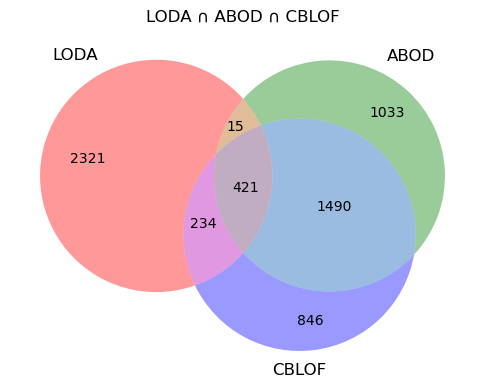

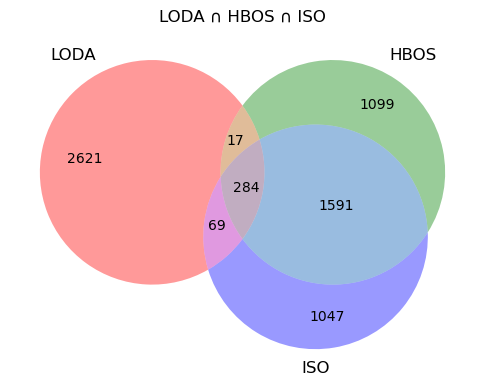

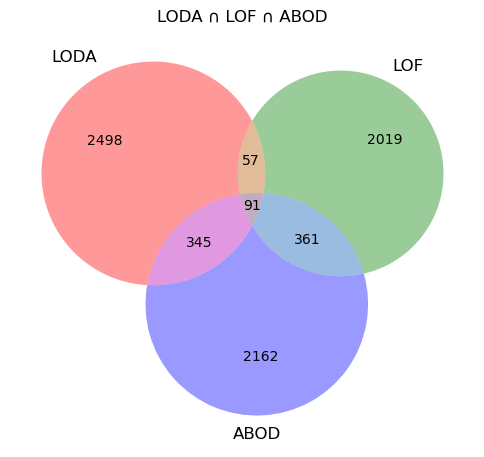

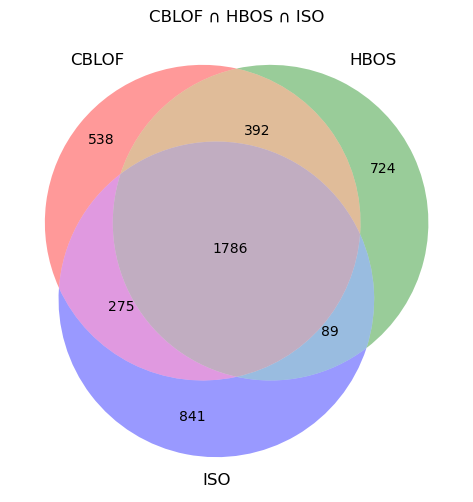

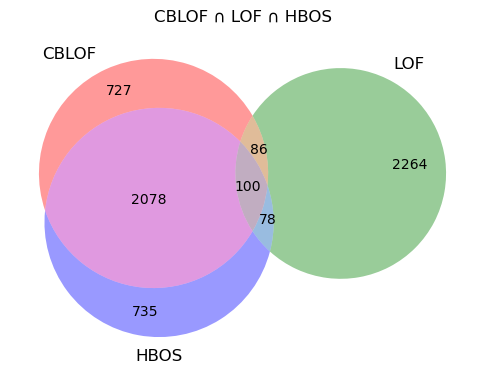

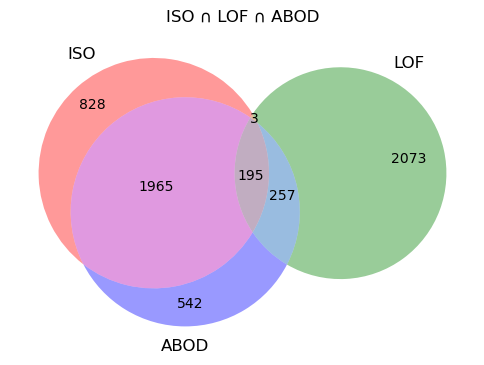

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# assume df is already defined, e.g.:
# df = pd.read_csv('your_data.csv', index_col='your_id_column')

# the columns in your df
outlier_cols = [
    'Outlier HBOS', 'Outlier ISO', 'Outlier LODA',
    'Outlier LOF',  'Outlier CBLOF', 'Outlier ABOD'
]

# build a dict of sets of indices for each method
sets = {}
for col in outlier_cols:
    # extract the method name (e.g. 'HBOS' from 'Outlier HBOS')
    method = col.replace('Outlier ', '')
    # select the indices where df[col] == 1
    sets[method] = set(df.index[df[col] == 1])

def plot_venn(sets_dict, methods, figsize=(6,6), title=None):
    """
    Draws a 3-set Venn for the three methods in `methods`.
    sets_dict: dict mapping method name -> set of indices
    methods: list of three method names, e.g. ['LODA','ABOD','CBLOF']
    """
    a, b, c = methods
    set1, set2, set3 = sets_dict[a], sets_dict[b], sets_dict[c]

    plt.figure(figsize=figsize)
    v = venn3([set1, set2, set3], set_labels=(a, b, c))
    if title:
        plt.title(title)
    plt.show()

# now plot each of the requested combinations:
plot_venn(sets, ['LODA', 'ABOD', 'CBLOF'], title='LODA ∩ ABOD ∩ CBLOF')
plot_venn(sets, ['LODA', 'HBOS', 'ISO'],  title='LODA ∩ HBOS ∩ ISO')
plot_venn(sets, ['LODA', 'LOF', 'ABOD'],  title='LODA ∩ LOF ∩ ABOD')
plot_venn(sets, ['CBLOF','HBOS','ISO'],  title='CBLOF ∩ HBOS ∩ ISO')
plot_venn(sets, ['CBLOF','LOF','HBOS'],  title='CBLOF ∩ LOF ∩ HBOS')
plot_venn(sets, ['ISO',  'LOF','ABOD'],  title='ISO ∩ LOF ∩ ABOD')


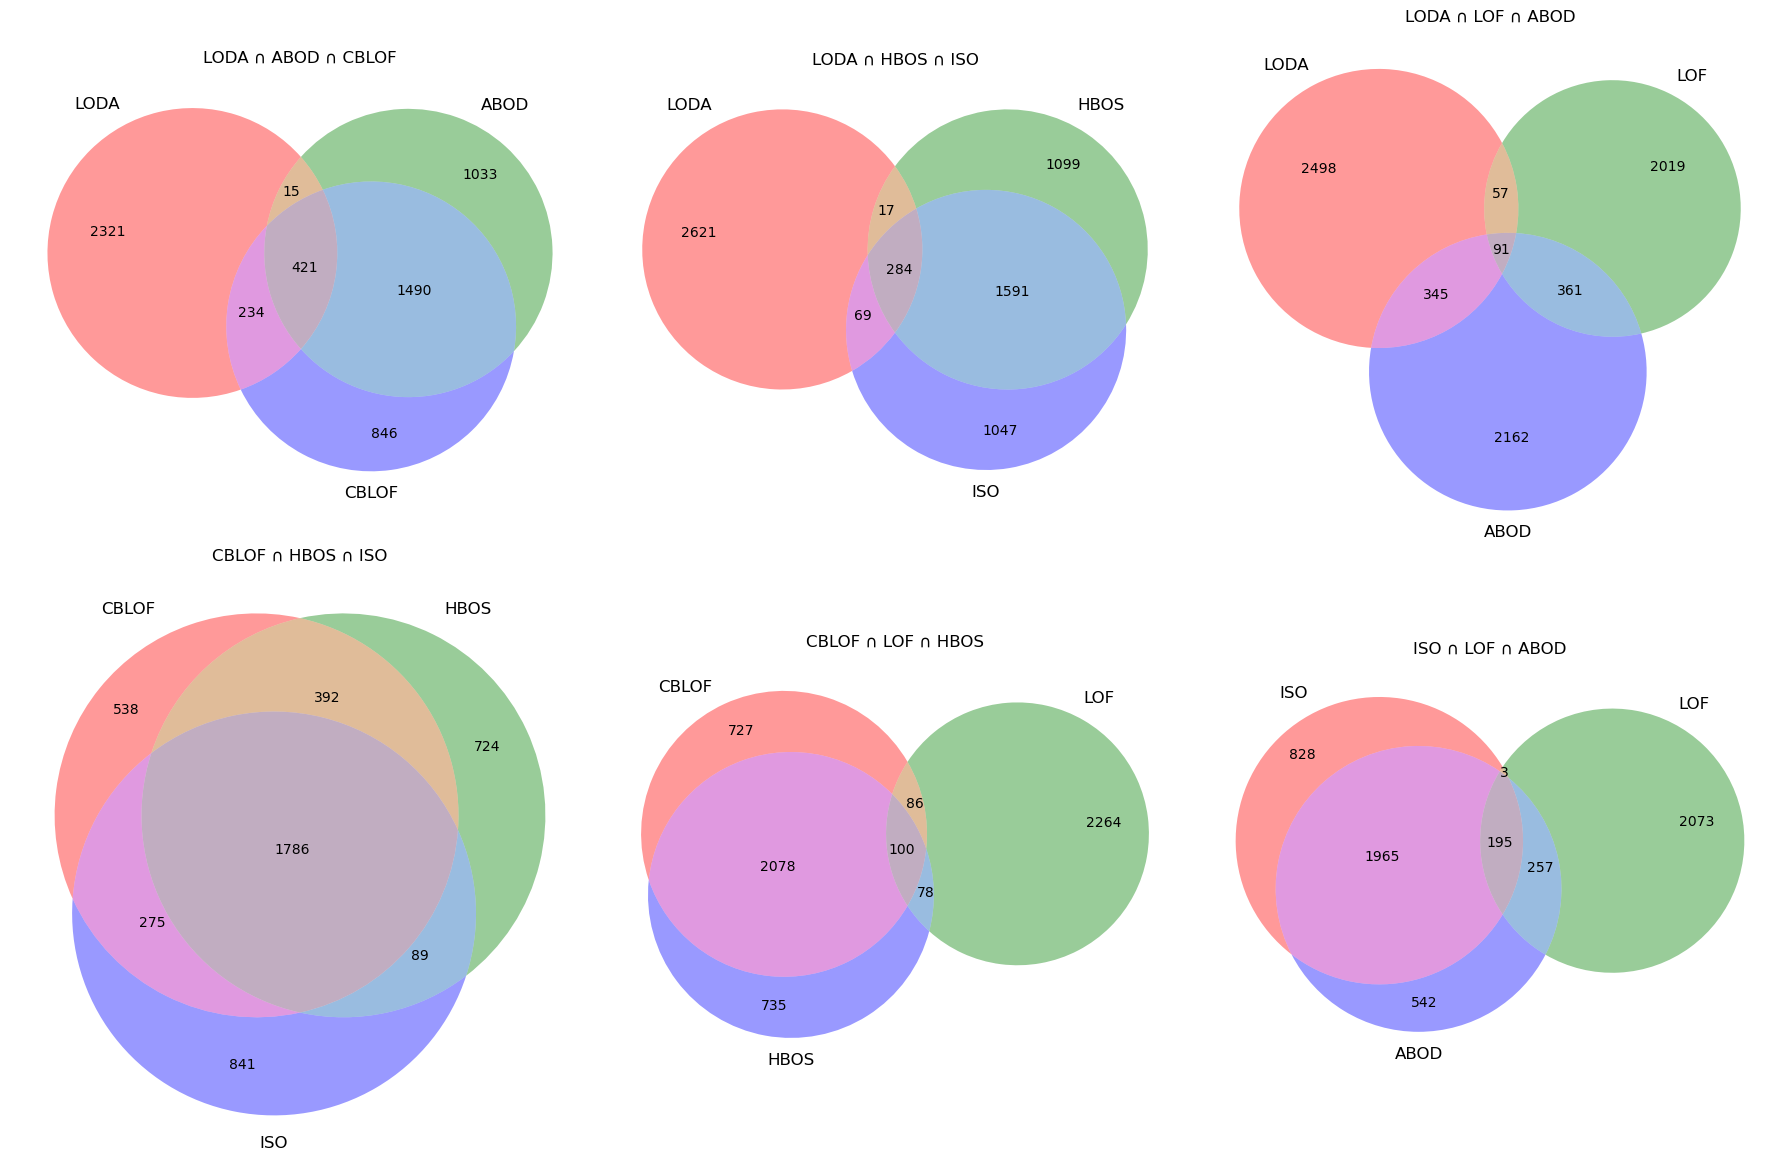

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Giả sử df đã có sẵn
# df = pd.read_csv('your_data.csv', index_col='your_id_column')

outlier_cols = [
    'Outlier HBOS', 'Outlier ISO', 'Outlier LODA',
    'Outlier LOF',  'Outlier CBLOF', 'Outlier ABOD'
]

# Xây dựng dict: method -> set of indices
sets = {}
for col in outlier_cols:
    method = col.replace('Outlier ', '')
    sets[method] = set(df.index[df[col] == 1])

# Danh sách các bộ 3 phương pháp và tiêu đề
combos = [
    (['LODA',  'ABOD',  'CBLOF'], 'LODA ∩ ABOD ∩ CBLOF'),
    (['LODA',  'HBOS',  'ISO'],   'LODA ∩ HBOS ∩ ISO'),
    (['LODA',  'LOF',   'ABOD'],  'LODA ∩ LOF ∩ ABOD'),
    (['CBLOF', 'HBOS',  'ISO'],   'CBLOF ∩ HBOS ∩ ISO'),
    (['CBLOF', 'LOF',   'HBOS'],  'CBLOF ∩ LOF ∩ HBOS'),
    (['ISO',   'LOF',   'ABOD'],  'ISO ∩ LOF ∩ ABOD'),
]

# Tạo canvas 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for ax, (methods, title) in zip(axes, combos):
    a, b, c = methods
    set1, set2, set3 = sets[a], sets[b], sets[c]
    venn3([set1, set2, set3], set_labels=(a, b, c), ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()


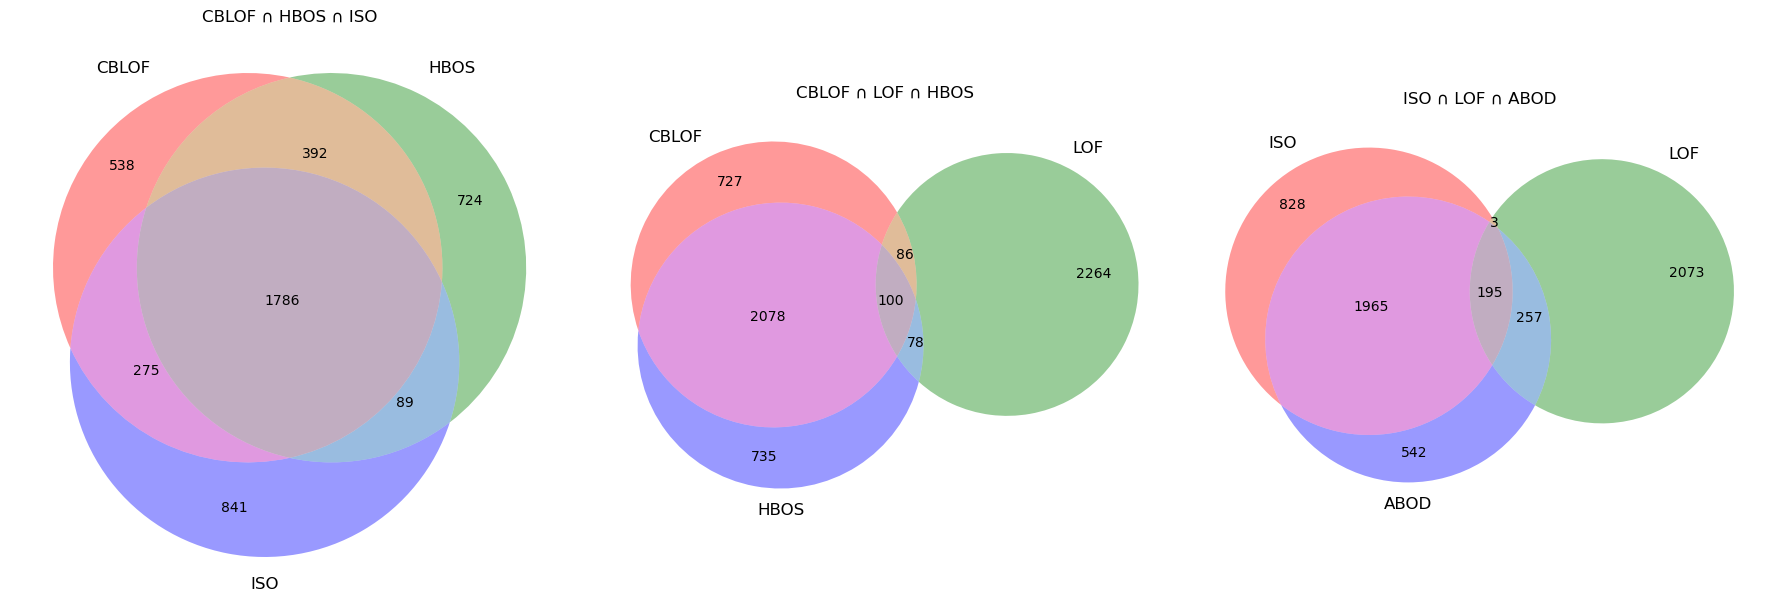

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Giả sử df đã có sẵn
# df = pd.read_csv('your_data.csv', index_col='your_id_column')

outlier_cols = [
    'Outlier HBOS', 'Outlier ISO', 'Outlier LODA',
    'Outlier LOF',  'Outlier CBLOF', 'Outlier ABOD'
]

# Xây dựng dict: method -> tập các index outlier
sets = {}
for col in outlier_cols:
    method = col.replace('Outlier ', '')
    sets[method] = set(df.index[df[col] == 1])

# Chỉ giữ 3 bộ ba bạn cần
combos = [
    (['CBLOF', 'HBOS', 'ISO'],  'CBLOF ∩ HBOS ∩ ISO'),
    (['CBLOF', 'LOF',  'HBOS'], 'CBLOF ∩ LOF ∩ HBOS'),
    (['ISO',   'LOF',  'ABOD'], 'ISO ∩ LOF ∩ ABOD'),
]

# Tạo canvas 1x3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

for ax, (methods, title) in zip(axes, combos):
    a, b, c = methods
    venn3([sets[a], sets[b], sets[c]], set_labels=(a, b, c), ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()


# Chạy K Means cho outliers dataset

In [6]:
#important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Giả sử filtered_df đã được định nghĩa trước đó
# Lọc các thuộc tính cụ thể từ filtered_df và gán vào numeric_df
attributes_to_select = ['runtimeMinutes', 'totalImages', 'totalVideos', 'criticReviewsTotal',
                       'canHaveEpisodes', 'isRatable', 'isAdult', 'numRegions',
                       'userReviewsTotal', 'ratingCount', 'castNumber', 'companiesNumber',
                       'averageRating', 'writerCredits', 'directorsCredits', 'quotesTotal',
                       'ratewinningawards']

# Lọc các cột từ filtered_df
numeric_df = df2[attributes_to_select]

In [12]:
print(numeric_df)

        runtimeMinutes  totalImages  totalVideos  criticReviewsTotal  \
3                  1.0            3            0                   2   
66                11.0           21            0                  48   
269              220.0           21            0                   3   
290              199.0           53            0                   9   
369              105.0          111            0                  31   
...                ...          ...          ...                 ...   
148760           144.0          254           21                 279   
148974            50.0           54            6                  44   
148975            30.0           50           88                   2   
149059           150.0          164           22                  47   
149149           107.0          511           45                 385   

        canHaveEpisodes  isRatable  isAdult  numRegions  userReviewsTotal  \
3                     0          1        0           6   

In [15]:
scaler = StandardScaler()
numeric_df_scale = scaler.fit_transform(numeric_df)

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
  

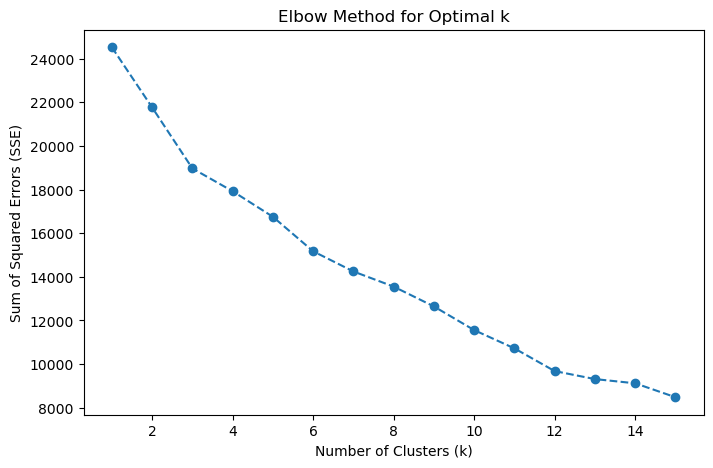

In [16]:
#calculate SSE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tính SSE cho các giá trị k từ 1 đến 15
sse = []
k_values = range(1, 16)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_df_scale)
    sse.append(kmeans.inertia_)  # inertia_ là SSE

# Vẽ đồ thị Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

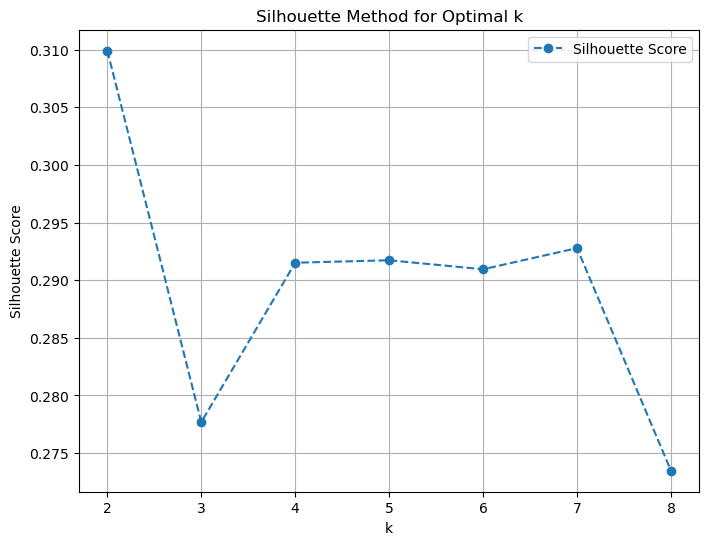

k = 2: Silhouette Score = 0.3099, Calinski-Harabasz = 207.0218, Davies-Bouldin = 1.8530
k = 3: Silhouette Score = 0.2777, Calinski-Harabasz = 205.8588, Davies-Bouldin = 1.6369
k = 4: Silhouette Score = 0.2915, Calinski-Harabasz = 196.4852, Davies-Bouldin = 1.3059
k = 5: Silhouette Score = 0.2917, Calinski-Harabasz = 181.5620, Davies-Bouldin = 1.1127
k = 6: Silhouette Score = 0.2909, Calinski-Harabasz = 171.2725, Davies-Bouldin = 0.9609
k = 7: Silhouette Score = 0.2928, Calinski-Harabasz = 171.7945, Davies-Bouldin = 0.8819
k = 8: Silhouette Score = 0.2735, Calinski-Harabasz = 177.6815, Davies-Bouldin = 0.8974


In [74]:
#calculate silhouette_score, calinski_harabasz_score, và davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Chạy lại đoạn mã tính silhouette_score, calinski_harabasz_score, và davies_bouldin_score
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Tính toán các chỉ số cho k từ 2 đến 8
k_values = range(2, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(numeric_df_scale)
    
    # Tính các chỉ số
    silhouette_scores.append(silhouette_score(numeric_df_scale, clusters))
    calinski_harabasz_scores.append(calinski_harabasz_score(numeric_df_scale, clusters))
    davies_bouldin_scores.append(davies_bouldin_score(numeric_df_scale, clusters))

# Minh họa Silhouette Score bằng biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title("Silhouette Method for Optimal k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# In các kết quả
for k, sil, cal_har, dav_bou in zip(k_values, silhouette_scores, calinski_harabasz_scores, davies_bouldin_scores):
    print(f"k = {k}: Silhouette Score = {sil:.4f}, Calinski-Harabasz = {cal_har:.4f}, Davies-Bouldin = {dav_bou:.4f}")

## k = 2

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Results for k = 2:
  Silhouette Score: 0.1890
  Calinski-Harabasz Score: 193.9011
  Davies-Bouldin Score: 2.1007




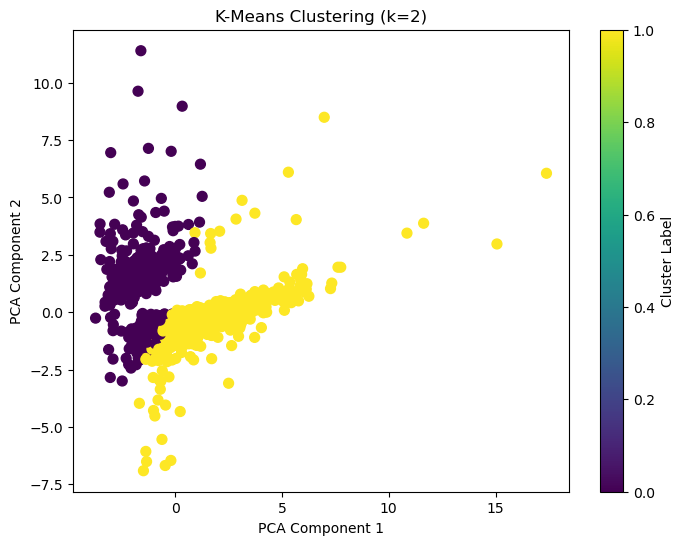

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Results for k = 3:
  Silhouette Score: 0.2751
  Calinski-Harabasz Score: 224.0318
  Davies-Bouldin Score: 1.5914




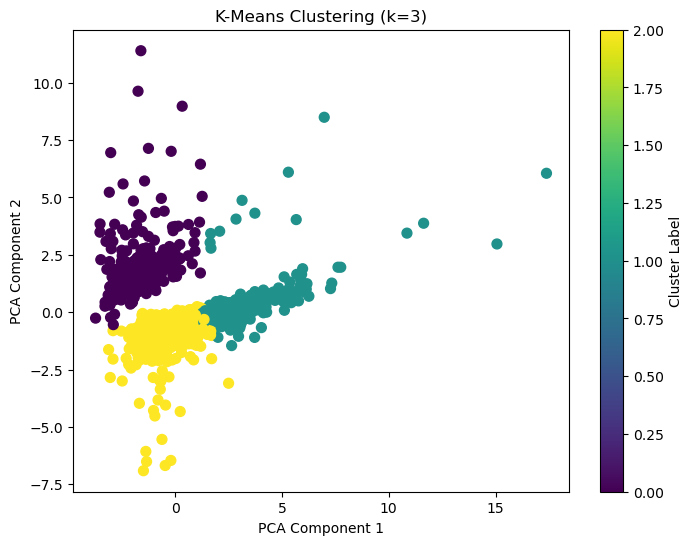

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Results for k = 4:
  Silhouette Score: 0.2778
  Calinski-Harabasz Score: 187.7089
  Davies-Bouldin Score: 1.2940




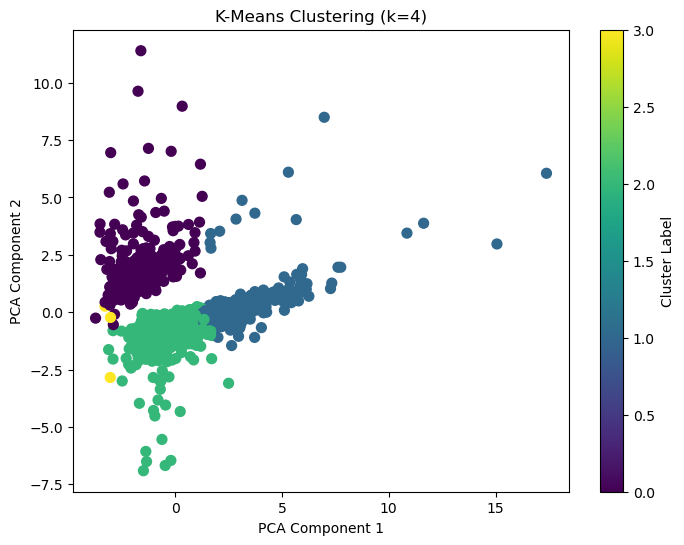

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Results for k = 5:
  Silhouette Score: 0.2834
  Calinski-Harabasz Score: 177.2388
  Davies-Bouldin Score: 1.1164




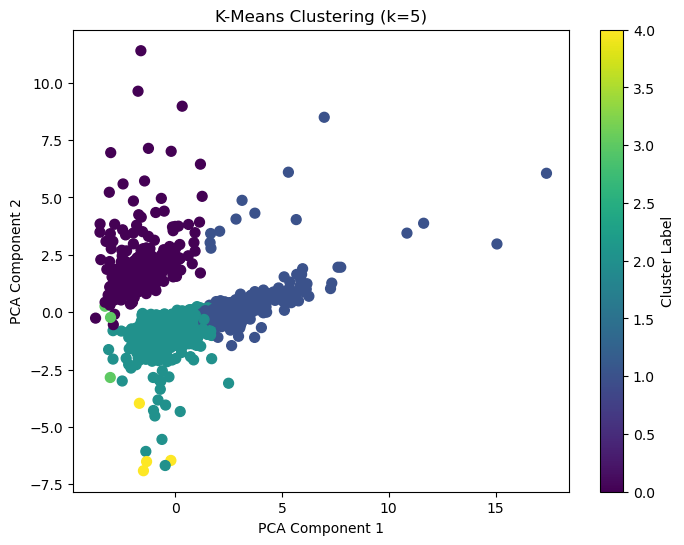

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Results for k = 6:
  Silhouette Score: 0.2995
  Calinski-Harabasz Score: 188.3170
  Davies-Bouldin Score: 0.9860




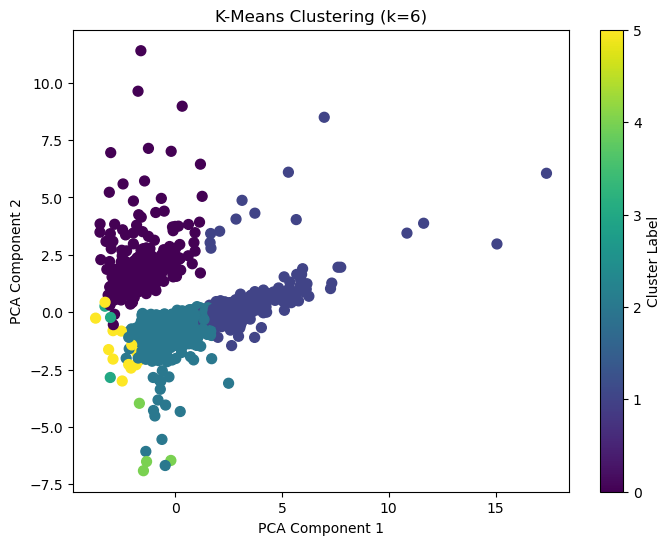

In [21]:
#PCA graph
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


# Danh sách các giá trị k cần thử nghiệm
k_values = [2, 3, 4, 5, 6]

# Lặp qua từng giá trị k
for k in k_values:
    # Chạy K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(numeric_df_scale)
    
    # Thêm nhãn cụm vào DataFrame
    df2[f'Cluster_k{k}'] = clusters

    # Tính các chỉ số
    silhouette_avg = silhouette_score(numeric_df_scale, clusters)
    calinski_harabasz = calinski_harabasz_score(numeric_df_scale, clusters)
    davies_bouldin = davies_bouldin_score(numeric_df_scale, clusters)
    
    # In kết quả
    print(f"Results for k = {k}:")
    print(f"  Silhouette Score: {silhouette_avg:.4f}")
    print(f"  Calinski-Harabasz Score: {calinski_harabasz:.4f}")
    print(f"  Davies-Bouldin Score: {davies_bouldin:.4f}")
    print("\n")
    
    # Trực quan hóa các cụm với PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(numeric_df_scale)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

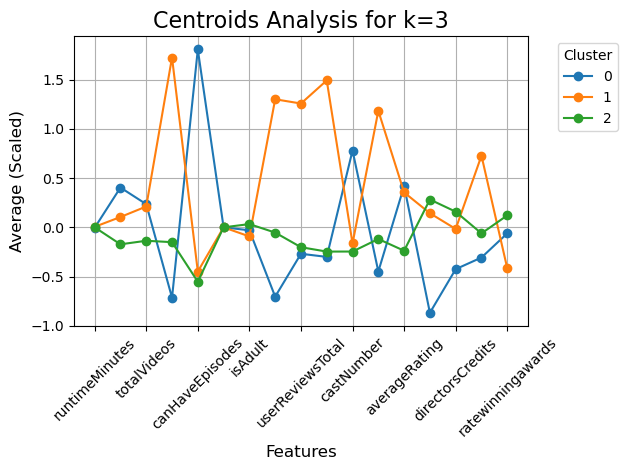

In [22]:
#Centroid analysis with k = 3 Kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numeric_df_scale)  # Phân cụm dữ liệu với k = 3
df2['Cluster'] = clusters  # Gán nhãn cụm vào DataFrame

# Tính trung bình các thuộc tính theo từng cụm (centroids)
cluster_centroids = pd.DataFrame(numeric_df_scale, columns=attributes_to_select)
cluster_centroids['Cluster'] = clusters
centroids_summary_k4 = cluster_centroids.groupby('Cluster').mean()

# Vẽ biểu đồ centroids analysis cho k = 3
plt.figure(figsize=(12, 6))
centroids_summary_k4.T.plot(marker='o')  # Chuyển vị DataFrame để vẽ
plt.title("Centroids Analysis for k=3", fontsize=16)
plt.ylabel("Average (Scaled)", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
print(df2['Cluster'].value_counts())

Cluster
2    956
0    349
1    228
Name: count, dtype: int64
